# Pubcrypt benchmarking

a refaire...

## Table of contents



## Case #1: Miller Rabin primality test

The first algorithm I wanted to improve was the Miller-Rabin primality test, the algorithm that check if yes or not a number is prime.
The keypair generator algorithm is mainly based on this test, the remaining code is about picking a random number and verify RSA properties.
My observation is the following: the time of generation for a keypair vary a lot from one to another. For instance one keypair can take 4s and another one 20s.
Which is logical because the point of my algorithm is to, first, pick a random number then verify is primality which doesn't give us the guarantee to find quickly a prime number. It can be instantly as it can be endless.
Our goal is to optimize the algorithm so it can verify more number is a shorter time to improve our chance to find a prime number.

Let's start, this what the Miller-Rabin look like for now:

In [1]:
from random import randint

def miller_rabin(p, r):
    """Credit: https://rosettacode.org/wiki/Miller%E2%80%93Rabin_primality_test#Python"""
    s = 0
    d = p-1
    while d%2==0:
        d>>=1
        s+=1
    assert(pow(2, s) * d == p-1)
    
    def trial_composite(a):
        if pow(a, d, p) == 1:
            return 0

        for i in range(s):
            if pow(a, pow(2, i) * d, p) == p-1:
                return 0
        return 1  
    
    for _ in range(r): #number of trials 
        a = randint(2, p)
        if trial_composite(a):
            return 0
    return 1

And this how long it takes to generate 10 keypairs. In ordinate you see the time generation in second and in ascissa the number of keypair:<br/>
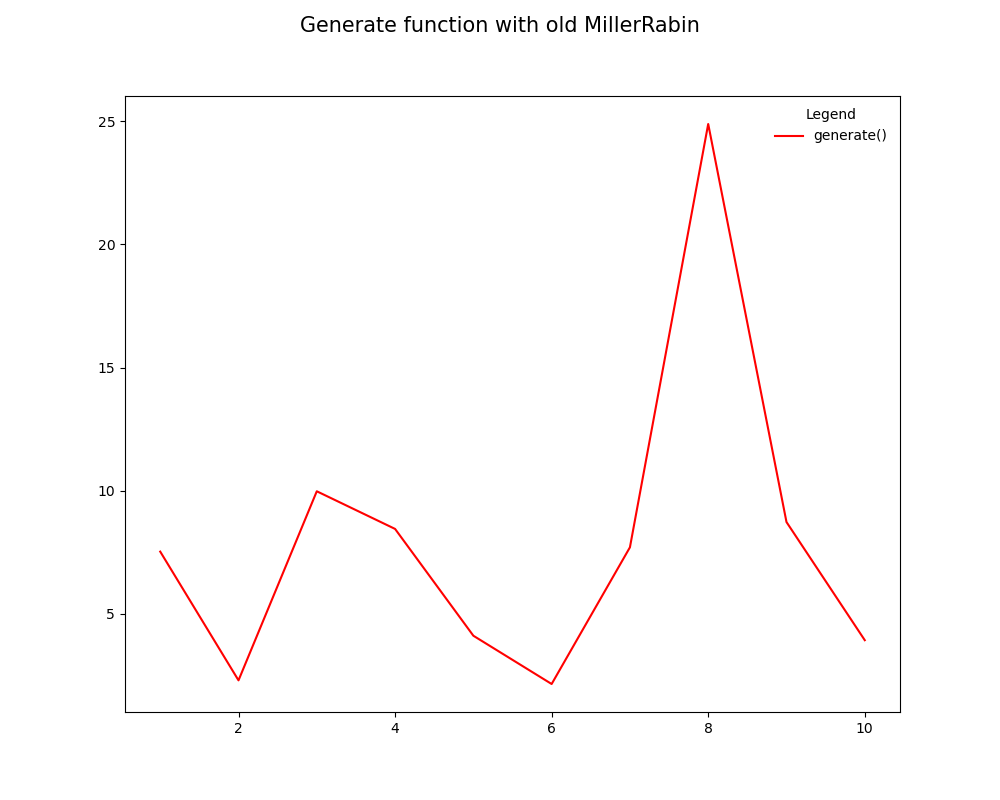

As we can see, the Miller-Rabin test is quite heavy. There are a lot of loop, condition and even a function in the main function. 
I've been looking for a lot of different implementation on the internet since I started coding this function and I didn't find better with this one.
So I asked chatGPT to improve my algorithm and indeed this function into a function was the issue. He gave me this correction:

In [2]:
def miller_rabin(p, r):
    s, d = 0, p - 1
    while d % 2 == 0:
        d >>= 1
        s += 1

    for _ in range(r):
        a = randint(2, p - 2)
        x = pow(a, d, p)
        if x == 1 or x == p - 1:
            continue
        for _ in range(s - 1):
            x = pow(x, 2, p)
            if x == p - 1:
                break
        else:
            return 0

    return 1

I simply change the function by a loop. The new function look a bit different from the old one but they remains to the same thing.
Here is a speed test between the two functions: